## MovieLens Recommendation System

Notebook ini berisi tahapan lengkap pembuatan sistem rekomendasi film berbasis MovieLens, mulai dari pemahaman data, eksplorasi, persiapan data, pemodelan, hingga evaluasi. Setiap tahapan dijelaskan secara singkat untuk memudahkan pemahaman proses dan hasil yang diperoleh.

## Import Library
Import semua library yang dibutuhkan untuk semua proses yang akan dijalankan.

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Konfigurasi visualisasi
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


## Load Datasets
Pada bagian ini dilakukan proses load seluruh dataset yang akan digunakan, yaitu movies, ratings, tags, dan links. Data ini akan menjadi dasar untuk analisis dan pemodelan sistem rekomendasi.

In [2]:
# Load semua dataset
movies_df = pd.read_csv('datasets/movies.csv')
ratings_df = pd.read_csv('datasets/ratings.csv')
tags_df = pd.read_csv('datasets/tags.csv')
links_df = pd.read_csv('datasets/links.csv')

## Data Understanding
Bagian ini bertujuan untuk memahami struktur, isi, dan kualitas data. Ditampilkan beberapa baris awal dari setiap dataset untuk melihat format dan contoh data, serta dilakukan pengecekan ukuran dan missing value pada masing-masing dataset.

In [3]:
# Tampilkan 5 baris pertama untuk masing-masing
print("Movies:")
print(movies_df.head())
print("\nRatings:")
print(ratings_df.head())
print("\nTags:")
print(tags_df.head())
print("\nLinks:")
print(links_df.head())

Movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Tags:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       

### Ukuran dan missing value
Bagian ini bertujuan untuk memeriksa ukuran (jumlah baris/kolom) dan keberadaan missing value pada setiap dataset. Hal ini penting untuk memastikan data yang digunakan sudah bersih dan siap untuk proses analisis dan pemodelan.

In [4]:
# Cek informasi dataset dan missing value
print("Movies Info:")
print(movies_df.info())

print("\nRatings Info:")
print(ratings_df.info())

print("\nTags Info:")
print(tags_df.info())

print("\nLinks Info:")
print(links_df.info())


Movies Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Ratings Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Tags Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3

## Exploratory Data Analysis (EDA)
Analisis awal dilakukan untuk memahami pola dan distribusi data rating. Pada tahap ini, dilakukan visualisasi distribusi jumlah rating per user dan per film, serta ringkasan statistiknya untuk melihat sebaran aktivitas user dan popularitas film.

### Memeriksa Jumlah Rating
Pada tahap ini dilakukan analisis jumlah rating yang diberikan oleh setiap user dan jumlah rating yang diterima oleh setiap film. Visualisasi distribusi ini membantu memahami pola aktivitas user dan popularitas film dalam dataset. Selain itu, ringkasan statistik juga ditampilkan untuk memberikan gambaran sebaran jumlah rating.

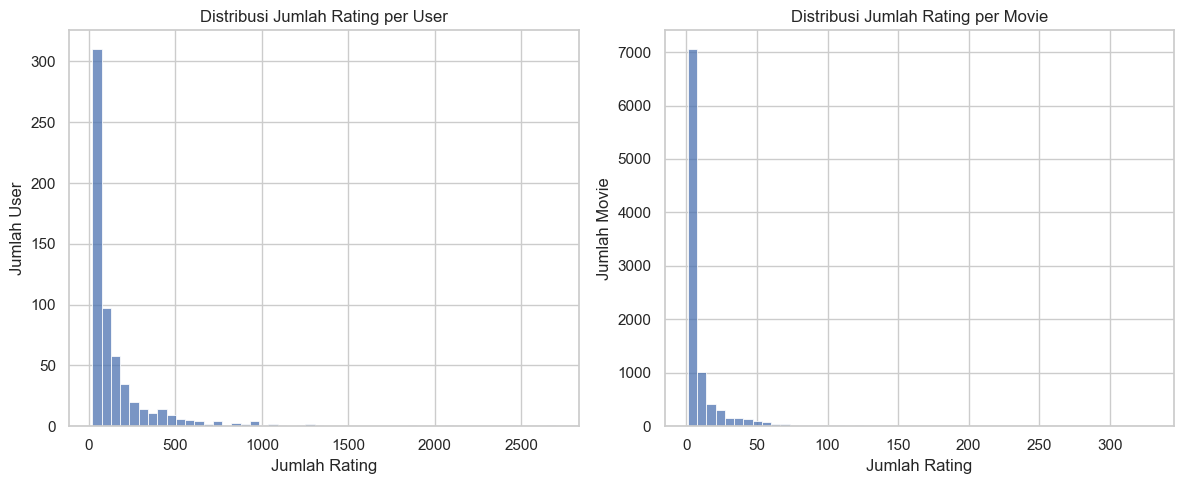

Statistik Jumlah Rating per User:
count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
dtype: float64

Statistik Jumlah Rating per Movie:
count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
dtype: float64


In [5]:
ratings = pd.read_csv("datasets/ratings.csv")

# Jumlah rating per user
ratings_per_user = ratings.groupby("userId").size()

# Jumlah rating per movie
ratings_per_movie = ratings.groupby("movieId").size()

# Visualisasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(ratings_per_user, bins=50)
plt.title("Distribusi Jumlah Rating per User")
plt.xlabel("Jumlah Rating")
plt.ylabel("Jumlah User")

plt.subplot(1, 2, 2)
sns.histplot(ratings_per_movie, bins=50)
plt.title("Distribusi Jumlah Rating per Movie")
plt.xlabel("Jumlah Rating")
plt.ylabel("Jumlah Movie")

plt.tight_layout()
plt.show() 
# Tampilkan ringkasan statistik jumlah rating per user dan per movie
print("Statistik Jumlah Rating per User:")
print(ratings_per_user.describe())
print("\nStatistik Jumlah Rating per Movie:")
print(ratings_per_movie.describe())

### Distribusi Rating
Visualisasi distribusi nilai rating yang diberikan oleh user. Diperlihatkan juga jumlah masing-masing rating (1-5) untuk mengetahui kecenderungan user dalam memberikan penilaian.

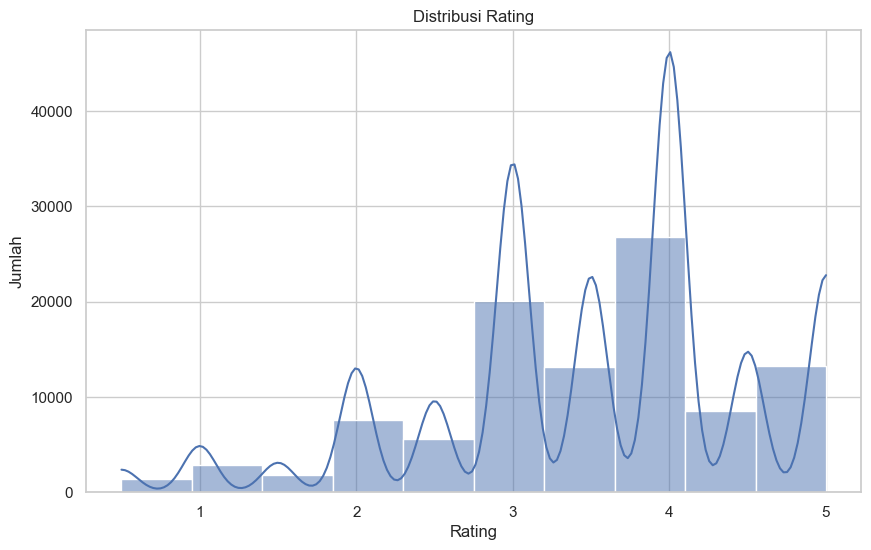

Jumlah rating 1: 2811
Jumlah rating 2: 7551
Jumlah rating 3: 20047
Jumlah rating 4: 26818
Jumlah rating 5: 13211


In [6]:
# Plot distribusi rating
sns.histplot(ratings_df['rating'], bins=10, kde=True)
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()
# Tampilkan jumlah masing-masing rating (1,2,3,4,5)
rating_counts = ratings_df['rating'].value_counts().sort_index()
for rating in range(1, 6):
    count = rating_counts.get(rating, 0)
    print(f"Jumlah rating {rating}: {count}")

### Film dengan Rating Terbanyak
Analisis film dengan rating terbanyak untuk mengetahui film-film yang paling populer di dataset. Ditampilkan 10 film teratas beserta jumlah rating yang diterima.

C:\Users\Yoga Samudra\AppData\Local\Temp\ipykernel_22864\2371570036.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_films, y='title', x='Jumlah Rating', palette='viridis')


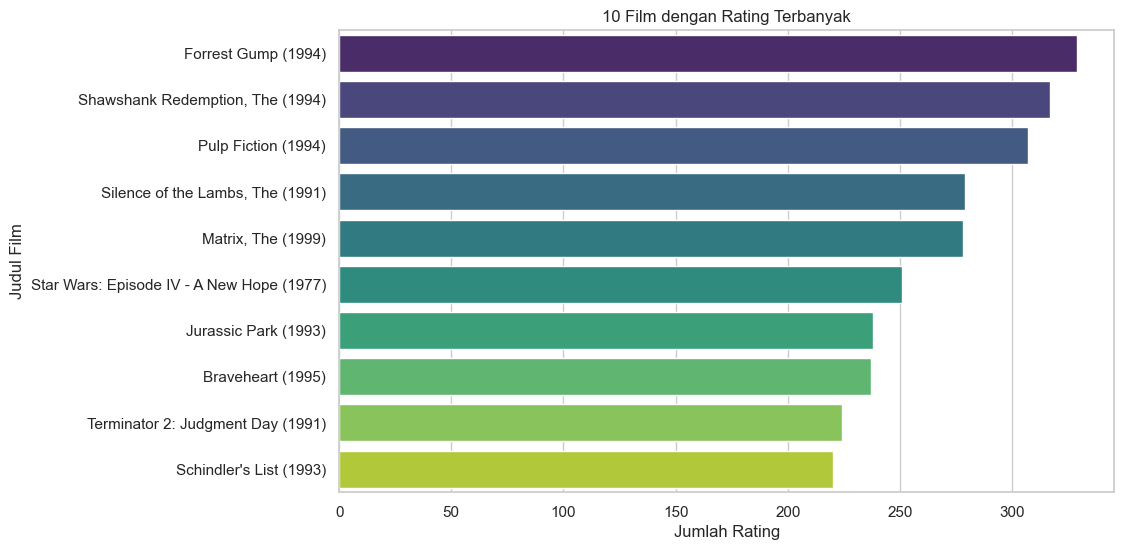

10 Film dengan Rating Terbanyak:
                                    title  Jumlah Rating
                      Forrest Gump (1994)            329
         Shawshank Redemption, The (1994)            317
                      Pulp Fiction (1994)            307
         Silence of the Lambs, The (1991)            279
                       Matrix, The (1999)            278
Star Wars: Episode IV - A New Hope (1977)            251
                     Jurassic Park (1993)            238
                        Braveheart (1995)            237
        Terminator 2: Judgment Day (1991)            224
                  Schindler's List (1993)            220


In [7]:
# Hitung jumlah rating per film
film_popularitas = ratings_df.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10)

# Gabungkan dengan judul
top_films = pd.merge(film_popularitas.reset_index(), movies_df, on='movieId')
top_films.columns = ['movieId', 'Jumlah Rating', 'title', 'genres']

# Plot
sns.barplot(data=top_films, y='title', x='Jumlah Rating', palette='viridis')
plt.title('10 Film dengan Rating Terbanyak')
plt.xlabel('Jumlah Rating')
plt.ylabel('Judul Film')
plt.show()
# Tampilkan tabel 10 film dengan rating terbanyak
print("10 Film dengan Rating Terbanyak:")
print(top_films[['title', 'Jumlah Rating']].to_string(index=False))

## Data Preparation
Bagian ini berisi tahapan persiapan data sebelum pemodelan. Data diproses agar sesuai dengan kebutuhan masing-masing pendekatan (content-based dan collaborative filtering).

### Untuk Content-Based Filtering
Persiapan data untuk content-based filtering dimulai dengan membersihkan kolom genres pada dataset film agar dapat diproses lebih lanjut.

In [8]:
# Load data film
movies = pd.read_csv('datasets/movies.csv')

# Lihat beberapa data awal
print(movies.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


#### Bersihkan kolom genres
Pada tahap ini kolom genres dibersihkan agar dapat diproses oleh TF-IDF 

In [9]:
# Ganti '|' menjadi spasi agar bisa diproses oleh TF-IDF
movies['genres_clean'] = movies['genres'].str.replace('|', ' ', regex=False)


#### TF-IDF Vectorization
Pada tahap ini, dilakukan ekstraksi fitur genre menggunakan TF-IDF Vectorizer. Setiap film direpresentasikan sebagai vektor numerik berdasarkan genre-nya, yang akan digunakan untuk menghitung kemiripan antar film.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi dan transformasi TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres_clean'])

# Simpan feature names
tfidf_feature_names = tfidf.get_feature_names_out()

# Lihat dimensi matrix
print("TF-IDF Matrix shape:", tfidf_matrix.shape)


TF-IDF Matrix shape: (9742, 23)


#### Menyimpan Data yang Dibutuhkan
Data penting seperti movieId dan title disimpan untuk keperluan interpretasi hasil rekomendasi pada tahap selanjutnya.

In [11]:
# Simpan dataframe untuk kebutuhan model nanti
movie_ids = movies['movieId']
movie_titles = movies['title']


### Untuk Collaborative Filtering
Persiapan data untuk collaborative filtering, yaitu membaca data rating dan menampilkan beberapa baris awal untuk memastikan data sudah benar.

In [12]:
ratings = pd.read_csv('datasets/ratings.csv')

# Tampilkan 5 baris pertama
print(ratings.head())


   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


#### Buat user-item matrix
Membentuk user-item matrix, yaitu matriks dengan baris sebagai userId dan kolom sebagai movieId. Matriks ini akan digunakan untuk collaborative filtering.

In [13]:
# Buat matriks pengguna x film (nilai = rating)
user_item_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')

# Tampilkan ukuran dan contoh matriks
print("User-Item Matrix shape:", user_item_matrix.shape)
user_item_matrix.head()


User-Item Matrix shape: (610, 9724)


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nilai kosong (NaN) pada user-item matrix diisi dengan 0 agar dapat digunakan untuk perhitungan kemiripan dan prediksi rating.

In [14]:
# Ganti NaN dengan 0
user_item_matrix_filled = user_item_matrix.fillna(0)


#### Split Data
Data rating dibagi menjadi data latih (train) dan data uji (test) untuk keperluan evaluasi model collaborative filtering.

In [15]:
# Split data menjadi train dan test (misal, 80% train, 20% test)
train, test = train_test_split(ratings_df, test_size=0.2, random_state=42)

## Modeling
Pada tahap modeling, dua pendekatan utama digunakan untuk membangun sistem rekomendasi, yaitu Content-Based Filtering dan Collaborative Filtering.

### Content-Based Filtering
Pada bagian ini dilakukan pemodelan sistem rekomendasi berbasis konten (Content-Based Filtering). Model ini menggunakan kemiripan antar film berdasarkan genre yang telah direpresentasikan dalam bentuk vektor fitur.

#### Hitung Cosine Similarity antar Film
Fungsi berikut digunakan untuk mengambil daftar film yang paling mirip dengan film yang dipilih, berdasarkan nilai similarity tertinggi. Fungsi ini akan digunakan untuk menghasilkan rekomendasi film.

In [16]:
from sklearn.metrics.pairwise import linear_kernel

# Hitung cosine similarity dari TF-IDF matrix genre
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Simpan index berdasarkan judul
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()


#### Fungsi untuk mendapatkan rekomendasi
Fungsi berikut digunakan untuk mengambil daftar film yang paling mirip dengan film yang dipilih, berdasarkan nilai similarity tertinggi. Fungsi ini akan digunakan untuk menghasilkan rekomendasi film.

In [17]:
def get_recommendations(title, cosine_sim=cosine_sim, num_recommendations=10):
    # Dapatkan index dari judul film
    idx = indices[title]

    # Dapatkan pasangan (index, similarity) dan urutkan berdasarkan similarity
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil top N film (tidak termasuk dirinya sendiri)
    sim_scores = sim_scores[1:num_recommendations+1]

    # Ambil index film
    movie_indices = [i[0] for i in sim_scores]

    # Kembalikan daftar judul
    return movies['title'].iloc[movie_indices]


#### Hasil penggunaan — Rekomendasi untuk satu film
Contoh penggunaan fungsi rekomendasi untuk mencari film yang mirip dengan "Toy Story (1995)". Hasil rekomendasi ditampilkan dalam bentuk tabel.

In [18]:
# Contoh: Rekomendasikan film mirip dengan "Toy Story (1995)"
recommended_movies = get_recommendations("Toy Story (1995)")
print("Rekomendasi film mirip dengan 'Toy Story (1995)':")
print(recommended_movies)
# Visualisasi tabel rekomendasi
import matplotlib.pyplot as plt

# Buat DataFrame dari hasil rekomendasi
recommended_df = pd.DataFrame({'Rekomendasi': recommended_movies.values})

# Tampilkan tabel
print("\nTabel Rekomendasi Film:")
display(recommended_df)

Rekomendasi film mirip dengan 'Toy Story (1995)':
1706                                          Antz (1998)
2355                                   Toy Story 2 (1999)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
Name: title, dtype: object

Tabel Rekomendasi Film:


,Rekomendasi
0,Antz (1998)
1,Toy Story 2 (1999)
2,"Adventures of Rocky and Bullwinkle, The (2000)"
3,"Emperor's New Groove, The (2000)"
4,"Monsters, Inc. (2001)"
5,"Wild, The (2006)"
6,Shrek the Third (2007)
7,"Tale of Despereaux, The (2008)"
8,Asterix and the Vikings (Astérix et les Viking...
9,Turbo (2013)


### Collaborative Filtering (Item-based)
Pada bagian ini dilakukan pemodelan collaborative filtering (item-based), yaitu sistem rekomendasi yang memanfaatkan pola rating pengguna terhadap film untuk mencari kemiripan antar item (film).

####  Membuat matrix user-item rating
Membentuk kembali user-item matrix khusus untuk collaborative filtering, dengan userId sebagai baris, movieId sebagai kolom dan rating sebagai nilai.

In [19]:
# Membuat pivot table userId sebagai baris, movieId sebagai kolom, dan rating sebagai nilai
user_movie_ratings = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)


#### Hitung kemiripan antar item (movie)
Cosine similarity digunakan untuk menghitung tingkat kemiripan antar film berdasarkan pola rating dari seluruh user. Matriks kemiripan ini akan digunakan untuk proses rekomendasi item-based.

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

# Hitung cosine similarity antar item (film)
item_similarity = cosine_similarity(user_movie_ratings.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_movie_ratings.columns, columns=user_movie_ratings.columns)


#### Fungsi rekomendasi item-based CF
Fungsi berikut digunakan untuk menghasilkan rekomendasi film berdasarkan kemiripan item (item-based collaborative filtering). Fungsi ini mencari film yang paling mirip dengan film yang sudah diberi rating tinggi oleh user.

In [21]:
def get_item_based_recommendations(movie_id, user_rating=5, top_n=10):
    # Ambil skor kemiripan film lain dengan film yang diberikan
    sim_scores = item_similarity_df[movie_id]

    # Kalikan dengan rating user pada film tersebut
    sim_scores = sim_scores * user_rating

    # Urutkan film berdasarkan skor tertinggi, kecuali film itu sendiri
    sim_scores = sim_scores.sort_values(ascending=False)

    # Keluarkan film yang sama (movie_id)
    sim_scores = sim_scores.drop(movie_id, errors='ignore')

    # Ambil top_n film
    top_movies = sim_scores.head(top_n).index

    # Kembalikan judul film sesuai movieId
    return movies[movies['movieId'].isin(top_movies)]['title']


#### Hasil Penggunaan
Contoh penggunaan fungsi rekomendasi item-based collaborative filtering untuk mencari film yang mirip dengan "Toy Story (1995)" berdasarkan pola rating user lain.

In [22]:
# Misal user memberi rating 5 untuk film dengan movieId 1 (Toy Story)
recommended_items = get_item_based_recommendations(1, user_rating=5, top_n=10)
print("Rekomendasi film berdasarkan rating item Toy Story (movieId=1):")
print(recommended_items)
# Tampilkan urutan rekomendasi film dengan nomor saja (tanpa visual/bar/warna)
print("\nUrutan Rekomendasi Film (Item-based CF) untuk Toy Story (1995):")
for i, title in enumerate(recommended_items.values, 1):
    print(f"{i}. {title}")


Rekomendasi film berdasarkan rating item Toy Story (movieId=1):
224             Star Wars: Episode IV - A New Hope (1977)
314                                   Forrest Gump (1994)
322                                 Lion King, The (1994)
418                                  Jurassic Park (1993)
546                            Mission: Impossible (1996)
615                  Independence Day (a.k.a. ID4) (1996)
911     Star Wars: Episode VI - Return of the Jedi (1983)
964                                  Groundhog Day (1993)
969                             Back to the Future (1985)
2355                                   Toy Story 2 (1999)
Name: title, dtype: object

Urutan Rekomendasi Film (Item-based CF) untuk Toy Story (1995):
1. Star Wars: Episode IV - A New Hope (1977)
2. Forrest Gump (1994)
3. Lion King, The (1994)
4. Jurassic Park (1993)
5. Mission: Impossible (1996)
6. Independence Day (a.k.a. ID4) (1996)
7. Star Wars: Episode VI - Return of the Jedi (1983)
8. Groundhog Day (1993)


## Evaluation

### Content-Based Filtering (Precision)
Evaluasi sistem rekomendasi content-based filtering menggunakan metrik precision. Precision mengukur seberapa banyak film yang direkomendasikan benar-benar relevan bagi user.

#### Evaluasi Precision untuk Satu User
Contoh perhitungan precision untuk satu user, yaitu membandingkan hasil rekomendasi dengan daftar film yang pernah diberi rating tinggi oleh user tersebut.

In [23]:
# Contoh evaluasi precision untuk satu user
# Misal, user_id = 111, dan kita tahu film apa saja yang pernah diberi rating tinggi oleh user ini
user_id = 111
user_rated_movies = ratings_df[(ratings_df['userId'] == user_id) & (ratings_df['rating'] >= 4)]['movieId']
user_rated_titles = movies_df[movies_df['movieId'].isin(user_rated_movies)]['title']

# Pilih salah satu film yang pernah disukai user
if not user_rated_titles.empty:
    test_title = user_rated_titles.iloc[0]
    recommended_titles = get_recommendations(test_title, num_recommendations=10)
    # Hitung precision: berapa dari rekomendasi yang juga pernah diberi rating tinggi oleh user
    relevant = recommended_titles.isin(user_rated_titles).sum()
    precision = relevant / len(recommended_titles)
    print(f"Precision untuk user {user_id} dengan query '{test_title}': {precision:.2f}")
else:
    print("User tidak memiliki film dengan rating tinggi untuk evaluasi.")

Precision untuk user 111 dengan query 'Casino (1995)': 0.10


#### Evaluasi Precision untuk Beberapa User
Perhitungan precision untuk beberapa user sekaligus, untuk melihat seberapa baik sistem dalam merekomendasikan film yang relevan pada berbagai user.

In [24]:
# Daftar userId yang ingin dievaluasi
user_ids = [4, 100, 20, 30, 23, 50, 60, 70, 80, 90, 111]

precision_results = []

for user_id in user_ids:
    user_rated_movies = ratings_df[(ratings_df['userId'] == user_id) & (ratings_df['rating'] >= 4)]['movieId']
    user_rated_titles = movies_df[movies_df['movieId'].isin(user_rated_movies)]['title']
    if not user_rated_titles.empty:
        test_title = user_rated_titles.iloc[0]
        recommended_titles = get_recommendations(test_title, num_recommendations=10)
        relevant = recommended_titles.isin(user_rated_titles).sum()
        precision = relevant / len(recommended_titles)
        precision_results.append({
            'userId': user_id,
            'query_film': test_title,
            'precision': precision
        })
    else:
        precision_results.append({
            'userId': user_id,
            'query_film': '-',
            'precision': None
        })

precision_df = pd.DataFrame(precision_results)
print(precision_df)

    userId                                  query_film  precision
0        4  Nobody Loves Me (Keiner liebt mich) (1994)        0.1
1      100              American President, The (1995)        0.1
2       20                                Balto (1995)        0.2
3       30                           Braveheart (1995)        0.0
4       23                                 Heat (1995)        0.0
5       50                          Taxi Driver (1976)        0.0
6       60            Shawshank Redemption, The (1994)        0.1
7       70                     Dead Man Walking (1995)        0.2
8       80   Twelve Monkeys (a.k.a. 12 Monkeys) (1995)        0.3
9       90                              Sabrina (1995)        0.1
10     111                               Casino (1995)        0.1


#### Visualisasi Precision Beberapa User
Visualisasi hasil precision beberapa user dalam bentuk bar chart untuk memudahkan interpretasi performa sistem rekomendasi content-based filtering.

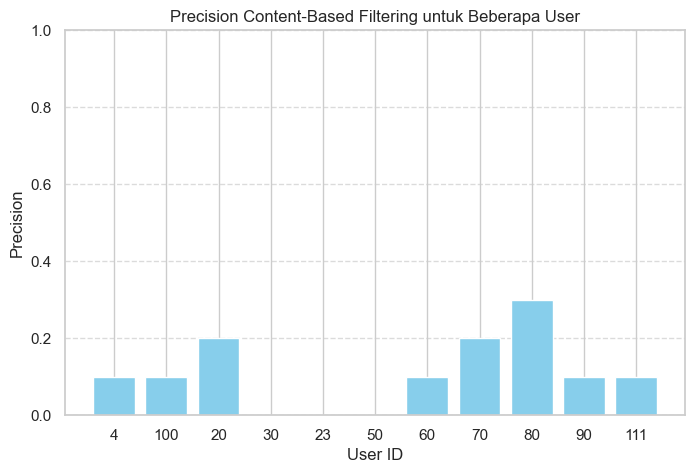

In [25]:
# Filter hanya user yang memiliki nilai precision (bukan None)
plot_df = precision_df.dropna(subset=['precision'])

plt.figure(figsize=(8, 5))
plt.bar(plot_df['userId'].astype(str), plot_df['precision'], color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Precision')
plt.title('Precision Content-Based Filtering untuk Beberapa User')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Collaborative Filtering (RMSE)
Evaluasi collaborative filtering dilakukan menggunakan metrik RMSE (Root Mean Squared Error) untuk mengukur seberapa dekat prediksi rating terhadap rating aktual user.

#### Menggunakan Data Train
Pada tahap ini, model collaborative filtering dilatih menggunakan data train. Matriks kemiripan antar item dihitung dari data latih, dan fungsi prediksi rating didefinisikan.

In [26]:
# Buat user-item matrix dari data train
train_matrix = train.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Hitung similarity matrix dari data train
item_similarity_train = cosine_similarity(train_matrix.T)
item_similarity_train_df = pd.DataFrame(item_similarity_train, index=train_matrix.columns, columns=train_matrix.columns)

def predict_rating(user_id, movie_id, user_movie_matrix, similarity_matrix):
    if movie_id not in similarity_matrix.columns or user_id not in user_movie_matrix.index:
        return np.nan
    # Ambil rating user untuk semua film
    user_ratings = user_movie_matrix.loc[user_id]
    # Ambil similarity film ini dengan semua film lain
    sim_scores = similarity_matrix[movie_id]
    # Hanya gunakan film yang pernah dirating user
    mask = user_ratings > 0
    if mask.sum() == 0:
        return np.nan
    sim_scores = sim_scores[mask]
    user_ratings = user_ratings[mask]
    if sim_scores.sum() == 0:
        return np.nan
    # Prediksi rating sebagai weighted average
    return np.dot(sim_scores, user_ratings) / sim_scores.sum()

#### Menggunakan Data Test
Prediksi rating dilakukan pada data test, kemudian dihitung nilai RMSE untuk mengukur akurasi model collaborative filtering secara keseluruhan.

In [27]:
# Prediksi rating untuk data test
y_true = []
y_pred = []
for row in test.itertuples():
    pred = predict_rating(row.userId, row.movieId, train_matrix, item_similarity_train_df)
    if not np.isnan(pred):
        y_true.append(row.rating)
        y_pred.append(pred)

if y_true:
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"RMSE Collaborative Filtering (item-based): {rmse:.2f}")
else:
    print("Tidak ada prediksi yang dapat dihitung untuk RMSE.")

RMSE Collaborative Filtering (item-based): 0.92


#### Evaluasi RMSE per User
Pada bagian ini dilakukan evaluasi performa model collaborative filtering secara individual untuk beberapa user. RMSE dihitung untuk setiap user berdasarkan prediksi dan rating aktual pada data uji, sehingga dapat diketahui variasi akurasi model pada masing-masing user.


In [28]:
# Ambil userId unik dari data test
user_ids_test = test['userId'].unique()

user_rmse_results = []

for user_id in user_ids_test[:10]:  # ambil 10 user pertama (atau ganti sesuai kebutuhan)
    user_test = test[test['userId'] == user_id]
    y_true = []
    y_pred = []
    for row in user_test.itertuples():
        pred = predict_rating(row.userId, row.movieId, train_matrix, item_similarity_train_df)
        if not np.isnan(pred):
            y_true.append(row.rating)
            y_pred.append(pred)
    if y_true:
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        user_rmse_results.append({'userId': user_id, 'rmse': rmse})
    else:
        user_rmse_results.append({'userId': user_id, 'rmse': None})

user_rmse_df = pd.DataFrame(user_rmse_results)
print(user_rmse_df)

   userId      rmse
0     432  0.799536
1     288  0.788933
2     599  0.780508
3      42  1.037038
4      75  1.565903
5      51  1.457307
6     354  0.560865
7     416  1.081811
8     438  1.034109
9      73  0.902877


#### Visualisasi RMSE per User
Perhitungan dan visualisasi RMSE untuk beberapa user secara individual, untuk melihat variasi performa model pada masing-masing user. Visualisasi ini membantu mengidentifikasi user yang prediksinya paling akurat maupun yang masih perlu perbaikan.

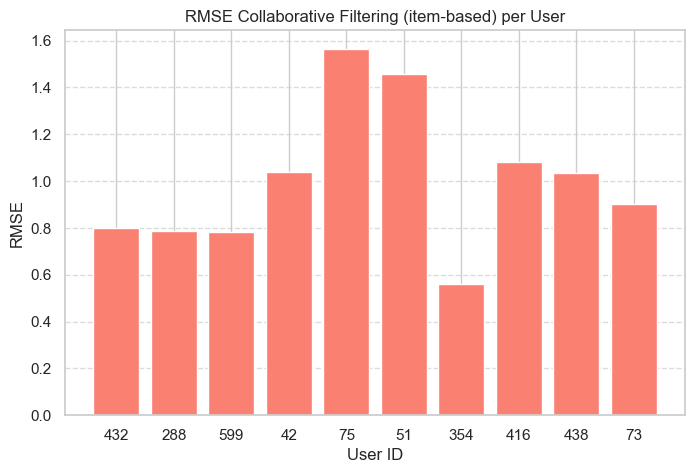

In [29]:
# Visualisasi RMSE per user
plot_rmse_df = user_rmse_df.dropna(subset=['rmse'])

plt.figure(figsize=(8, 5))
plt.bar(plot_rmse_df['userId'].astype(str), plot_rmse_df['rmse'], color='salmon')
plt.xlabel('User ID')
plt.ylabel('RMSE')
plt.title('RMSE Collaborative Filtering (item-based) per User')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()